In [1]:
import sys
sys.path.append("../")
import pandas as pd
import numpy as np
from experiments.create_state import get_state
import matplotlib.pyplot as plt
from itertools import product
from datetime import datetime
from typing import Tuple
from compute_utils import (
    get_loaded_states,
    to_dataframe,
    compute_statistics,
    load_results)

%matplotlib inline

In [2]:
results_dir = "../results/COBYLA/no_ent/distributions"
run_range = list(range(1, 11))
#qubit_range = [3, 4, 5, 6, 7, 8]
qubit_range = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# EPS values are mapped separately
#eps_values = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
eps_values = [0.5, 0.1, 0.05, 0.01]

### Normal distribution $(\mu = 0.5, \sigma = 0.3)$

In [3]:
state_type = "normal"

In [4]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [5]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.02650,0.02650,0.87320,0.87461
4,0.02770,0.02770,0.00561,0.94725
5,0.02670,0.02670,0.00650,0.00395
6,0.02590,0.02590,0.00651,0.00792
7,0.02550,0.02575,0.00641,0.00269
8,0.02520,0.02520,0.00640,0.00487
9,0.02510,0.02510,0.00657,0.00284
10,0.02510,0.02510,0.00640,0.10343
11,0.02500,0.02500,0.00658,0.00436


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0265,0.0265,0.0000,0.0000
4,0.0275,0.0275,0.0056,0.0000
5,0.0265,0.0265,0.7503,0.0013
6,0.0258,0.0258,0.0065,0.7501
7,0.0253,0.0253,0.5032,0.0016
8,0.0251,0.0251,0.0064,0.0016
9,0.0250,0.0250,0.0064,0.0016
10,0.0249,0.0249,0.0063,0.7504
11,0.0249,0.0249,0.7516,0.0016


In [6]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,True
7,False,False,True,False
8,False,False,False,False
9,False,False,False,False
10,False,False,False,True
11,False,False,True,False


In [7]:
n_qubits = 8
eps_value = 0.05
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

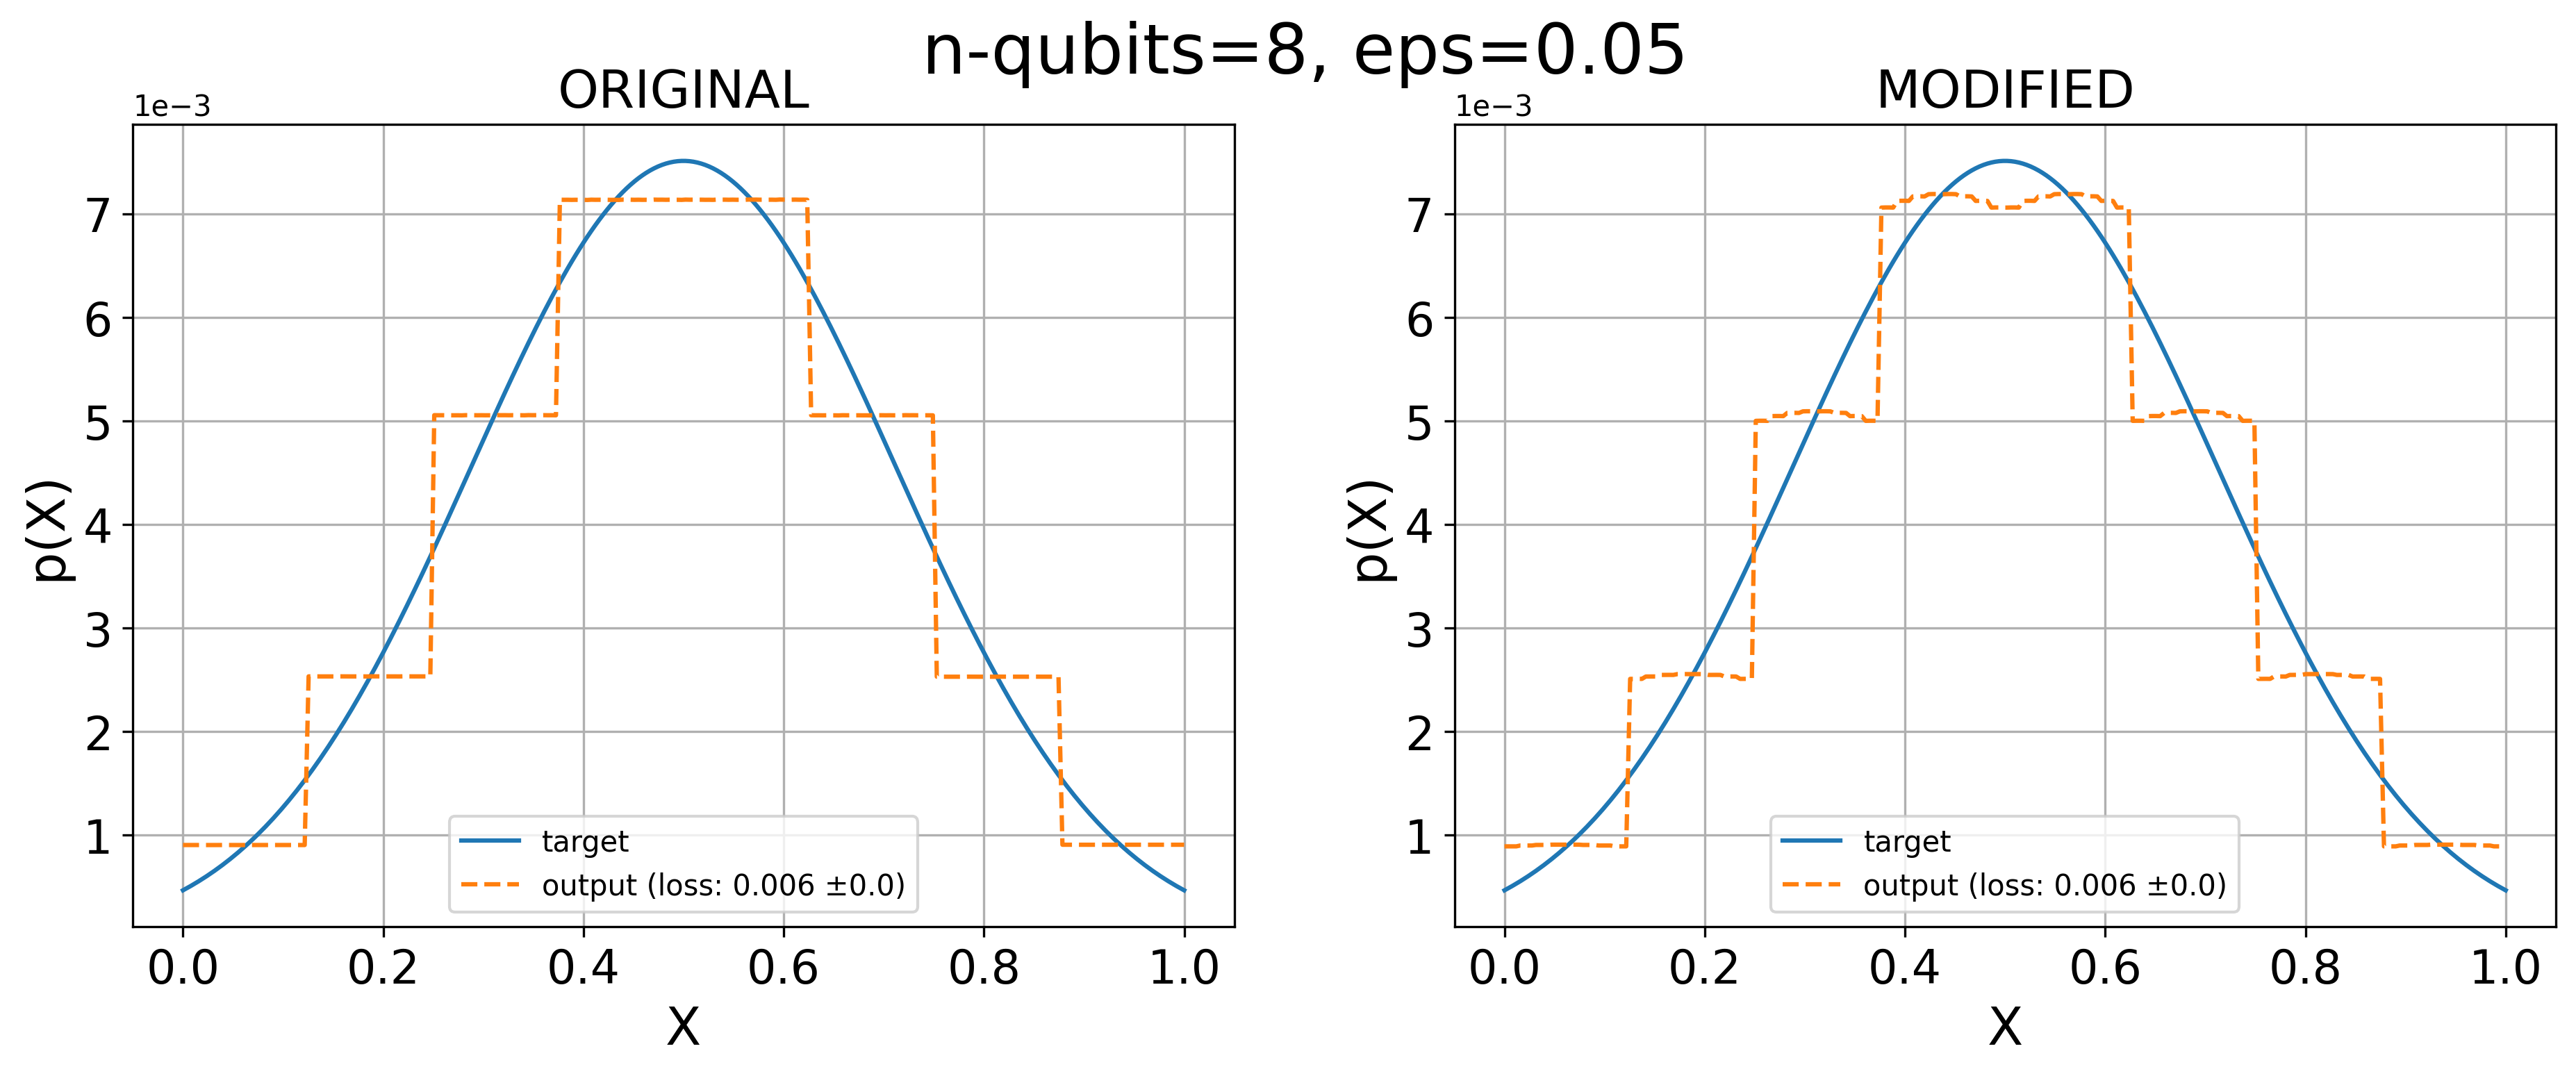

In [8]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc": 0.5, "scale": 0.3})


x_points = np.linspace(0, 1, 2**n_qubits)

target_freqs = np.abs(target_state)**2

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_freqs, label="target")
axes[0].plot(x_points, np.abs(sv_mean_original)**2, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_freqs, label="target")
axes[1].plot(x_points, np.abs(sv_mean_modified)**2, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### $log$-Normal Distribution $(s= 1, \mu = 0.1, \sigma = 0.3)$

In [9]:
state_type = "lognormal"

In [10]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [11]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.15460,0.15460,0.95570,0.88206
4,0.21620,0.21620,0.04246,0.95214
5,0.22560,0.22560,0.03785,0.02515
6,0.22200,0.22200,0.03038,0.02255
7,0.21910,0.21910,0.02879,0.01912
8,0.21750,0.21750,0.02744,0.02421
9,0.21670,0.21670,0.02624,0.03511
10,0.29457,0.21620,0.12467,0.01890
11,0.21600,0.29174,0.12318,0.01697


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1546,0.1546,0.0000,0.0000
4,0.2111,0.2111,0.0400,0.0000
5,0.2221,0.2221,0.7722,0.0135
6,0.2194,0.2194,0.0282,0.7529
7,0.2171,0.2171,0.5148,0.0131
8,0.2157,0.2157,0.0248,0.0129
9,0.2150,0.2150,0.0243,0.0126
10,0.2146,0.2146,0.0240,0.7532
11,0.2144,0.2144,0.7561,0.0124


In [12]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,True
7,False,False,True,False
8,False,False,False,False
9,False,False,False,False
10,False,False,False,True
11,False,False,True,False


In [13]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

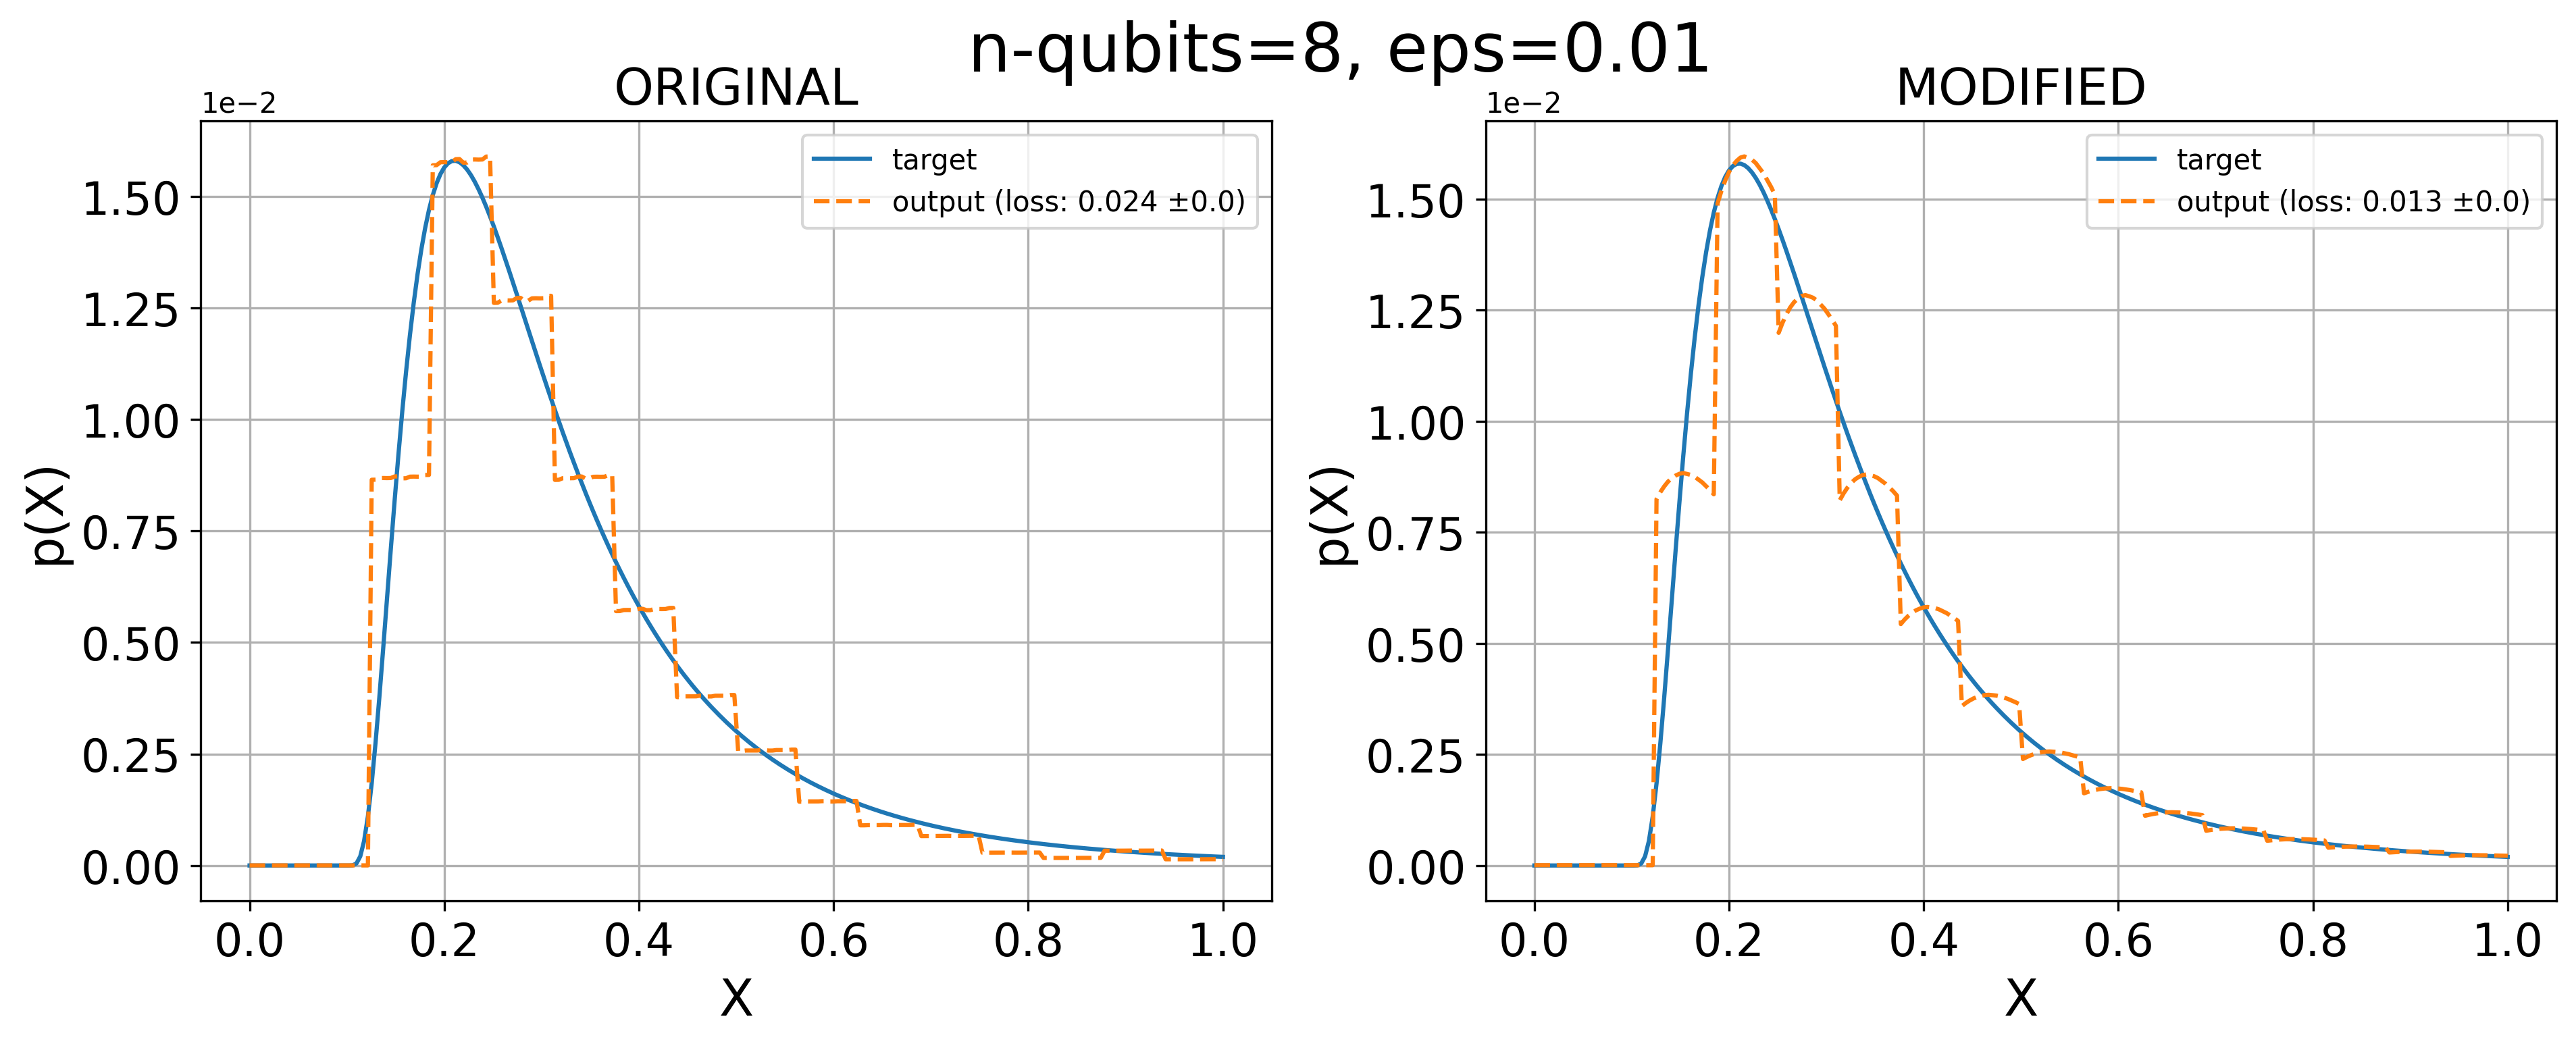

In [14]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "s": 1, "loc": 0.1, "scale": 0.3})


x_points = np.linspace(0, 1, 2**n_qubits)


target_freqs = np.abs(target_state)**2

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_freqs, label="target")
axes[0].plot(x_points, np.abs(sv_mean_original)**2, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_freqs, label="target")
axes[1].plot(x_points, np.abs(sv_mean_modified)**2, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### Bimodal Distribution $(\mu_1 = 0.25, \sigma_1 = 0.1; \mu_2 = 0.75, \sigma_2 = 0.15)$

In [15]:
state_type = "bimodal"

In [16]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [17]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.15370,0.15370,0.80220,0.87092
4,0.19370,0.19370,0.03350,0.92528
5,0.19410,0.19410,0.03805,0.00928
6,0.19150,0.19150,0.03820,0.01406
7,0.18960,0.18960,0.03804,0.01286
8,0.18850,0.18851,0.03875,0.01849
9,0.18800,0.18800,0.03770,0.01932
10,0.18770,0.18770,0.03761,0.02761
11,0.18750,0.18753,0.04143,0.01247


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1537,0.1537,0.0000,0.0000
4,0.1925,0.1925,0.0335,0.0000
5,0.1930,0.1930,0.7515,0.0078
6,0.1905,0.1905,0.0380,0.7511
7,0.1887,0.1887,0.5190,0.0097
8,0.1877,0.1877,0.0376,0.0097
9,0.1872,0.1872,0.0374,0.0097
10,0.1869,0.1869,0.0374,0.7525
11,0.1868,0.1868,0.7594,0.0097


In [18]:
display(df_stds_original)
display(df_stds_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0


In [19]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,True
7,False,False,True,False
8,False,False,False,False
9,False,False,False,False
10,False,False,False,True
11,False,False,True,False


In [20]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

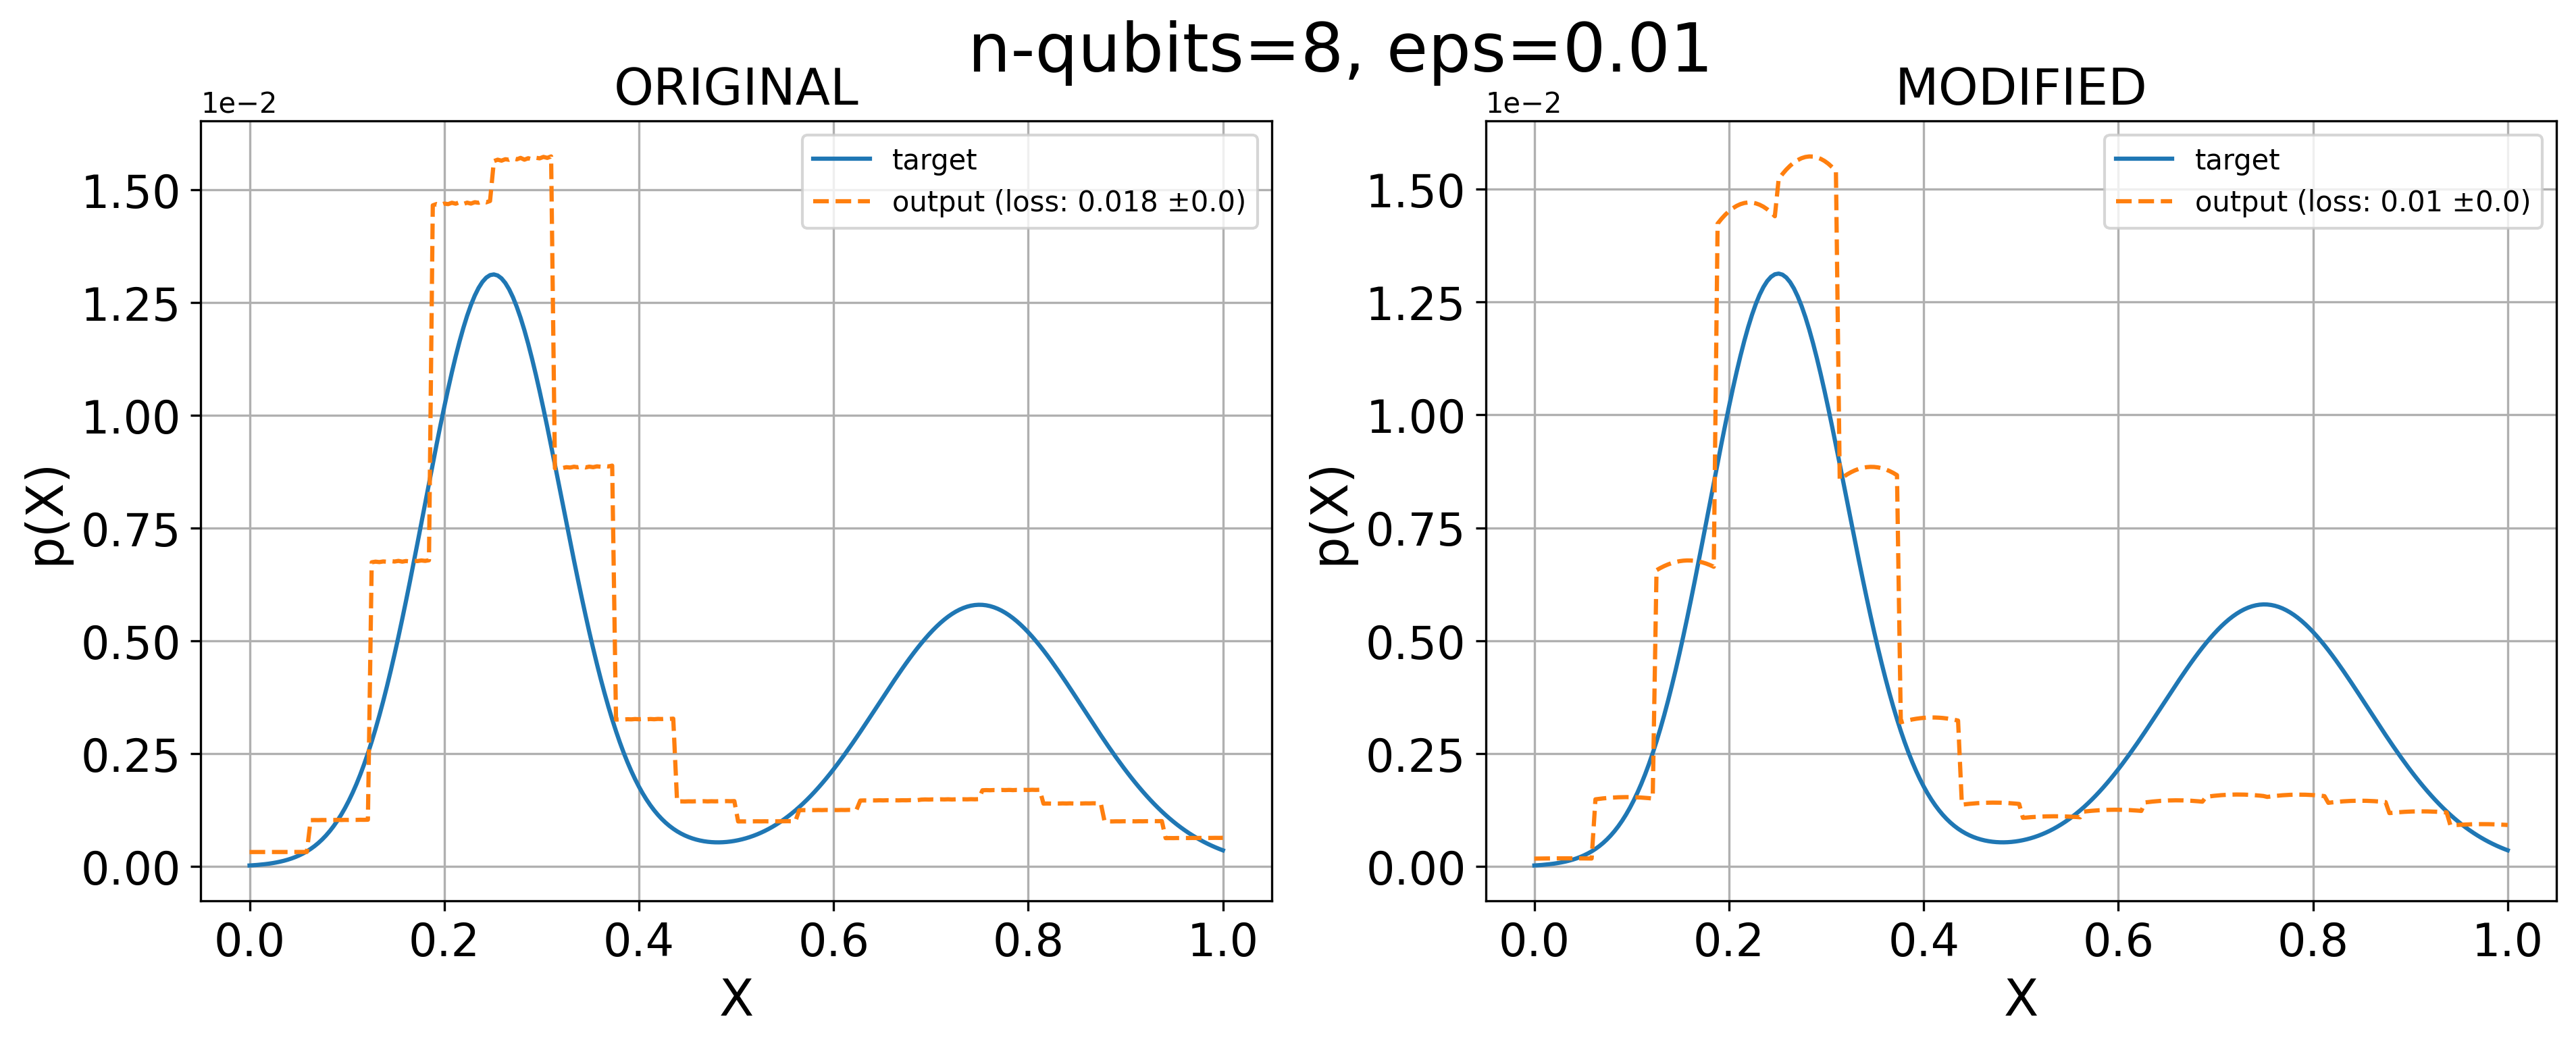

In [21]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc_bim1": 0.25, "scale_bim1": 0.1, "loc_bim2": 0.75, "scale_bim2": 0.15})


x_points = np.linspace(0, 1, 2**n_qubits)

target_freqs = np.abs(target_state)**2

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_freqs, label="target")
axes[0].plot(x_points, np.abs(sv_mean_original)**2, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_freqs, label="target")
axes[1].plot(x_points, np.abs(sv_mean_modified)**2, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")

### Laplace $(\mu = 0.5, \sigma = 0.2)$

In [22]:
state_type = "laplace"

In [23]:
original_results_dict, modified_results_dict = load_results(results_dir, state_type, qubit_range, run_range, eps_values)

mean_original_results_dict, stds_original_results_dict = compute_statistics(original_results_dict, qubit_range, eps_values)
mean_modified_results_dict, stds_modified_results_dict = compute_statistics(modified_results_dict, qubit_range, eps_values)

df_mean_original = to_dataframe(mean_original_results_dict)
df_stds_original = to_dataframe(stds_modified_results_dict)

df_mean_modified = to_dataframe(mean_modified_results_dict)
df_stds_modified = to_dataframe(stds_modified_results_dict)

In [24]:
display(df_mean_original)
display(df_mean_modified)

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.10510,0.10510,0.89938,0.81062
4,0.11770,0.11770,0.02689,0.95265
5,0.11710,0.11710,0.03236,0.01214
6,0.11530,0.11530,0.03583,0.01395
7,0.11410,0.11410,0.03245,0.01382
8,0.11340,0.11340,0.03188,0.01795
9,0.11300,0.11300,0.03506,0.11790
10,0.11280,0.11280,0.03207,0.11115
11,0.11270,0.11270,0.03451,0.01506


,0.5,0.1,0.05,0.01
num_qubits,,,,
3,0.1051,0.1051,0.0000,0.0000
4,0.1153,0.1153,0.0265,0.0000
5,0.1149,0.1149,0.7375,0.0064
6,0.1132,0.1132,0.0316,0.7469
7,0.1120,0.1120,0.5155,0.0080
8,0.1114,0.1114,0.0313,0.0081
9,0.1110,0.1110,0.0313,0.0081
10,0.1109,0.1109,0.0312,0.7520
11,0.1108,0.1108,0.7578,0.0081


In [25]:
df_mean_original < df_mean_modified

,0.5,0.1,0.05,0.01
num_qubits,,,,
3,False,False,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,True
7,False,False,True,False
8,False,False,False,False
9,False,False,False,False
10,False,False,False,True
11,False,False,True,False


In [26]:
n_qubits = 8
eps_value = 0.01
execution_range = 10

(sv_mean_original, sv_std_original), (sv_mean_modified, sv_std_modified) = get_loaded_states(results_dir=results_dir, state_type=state_type, execution_range=execution_range, n_qubits=n_qubits, eps_value=eps_value)

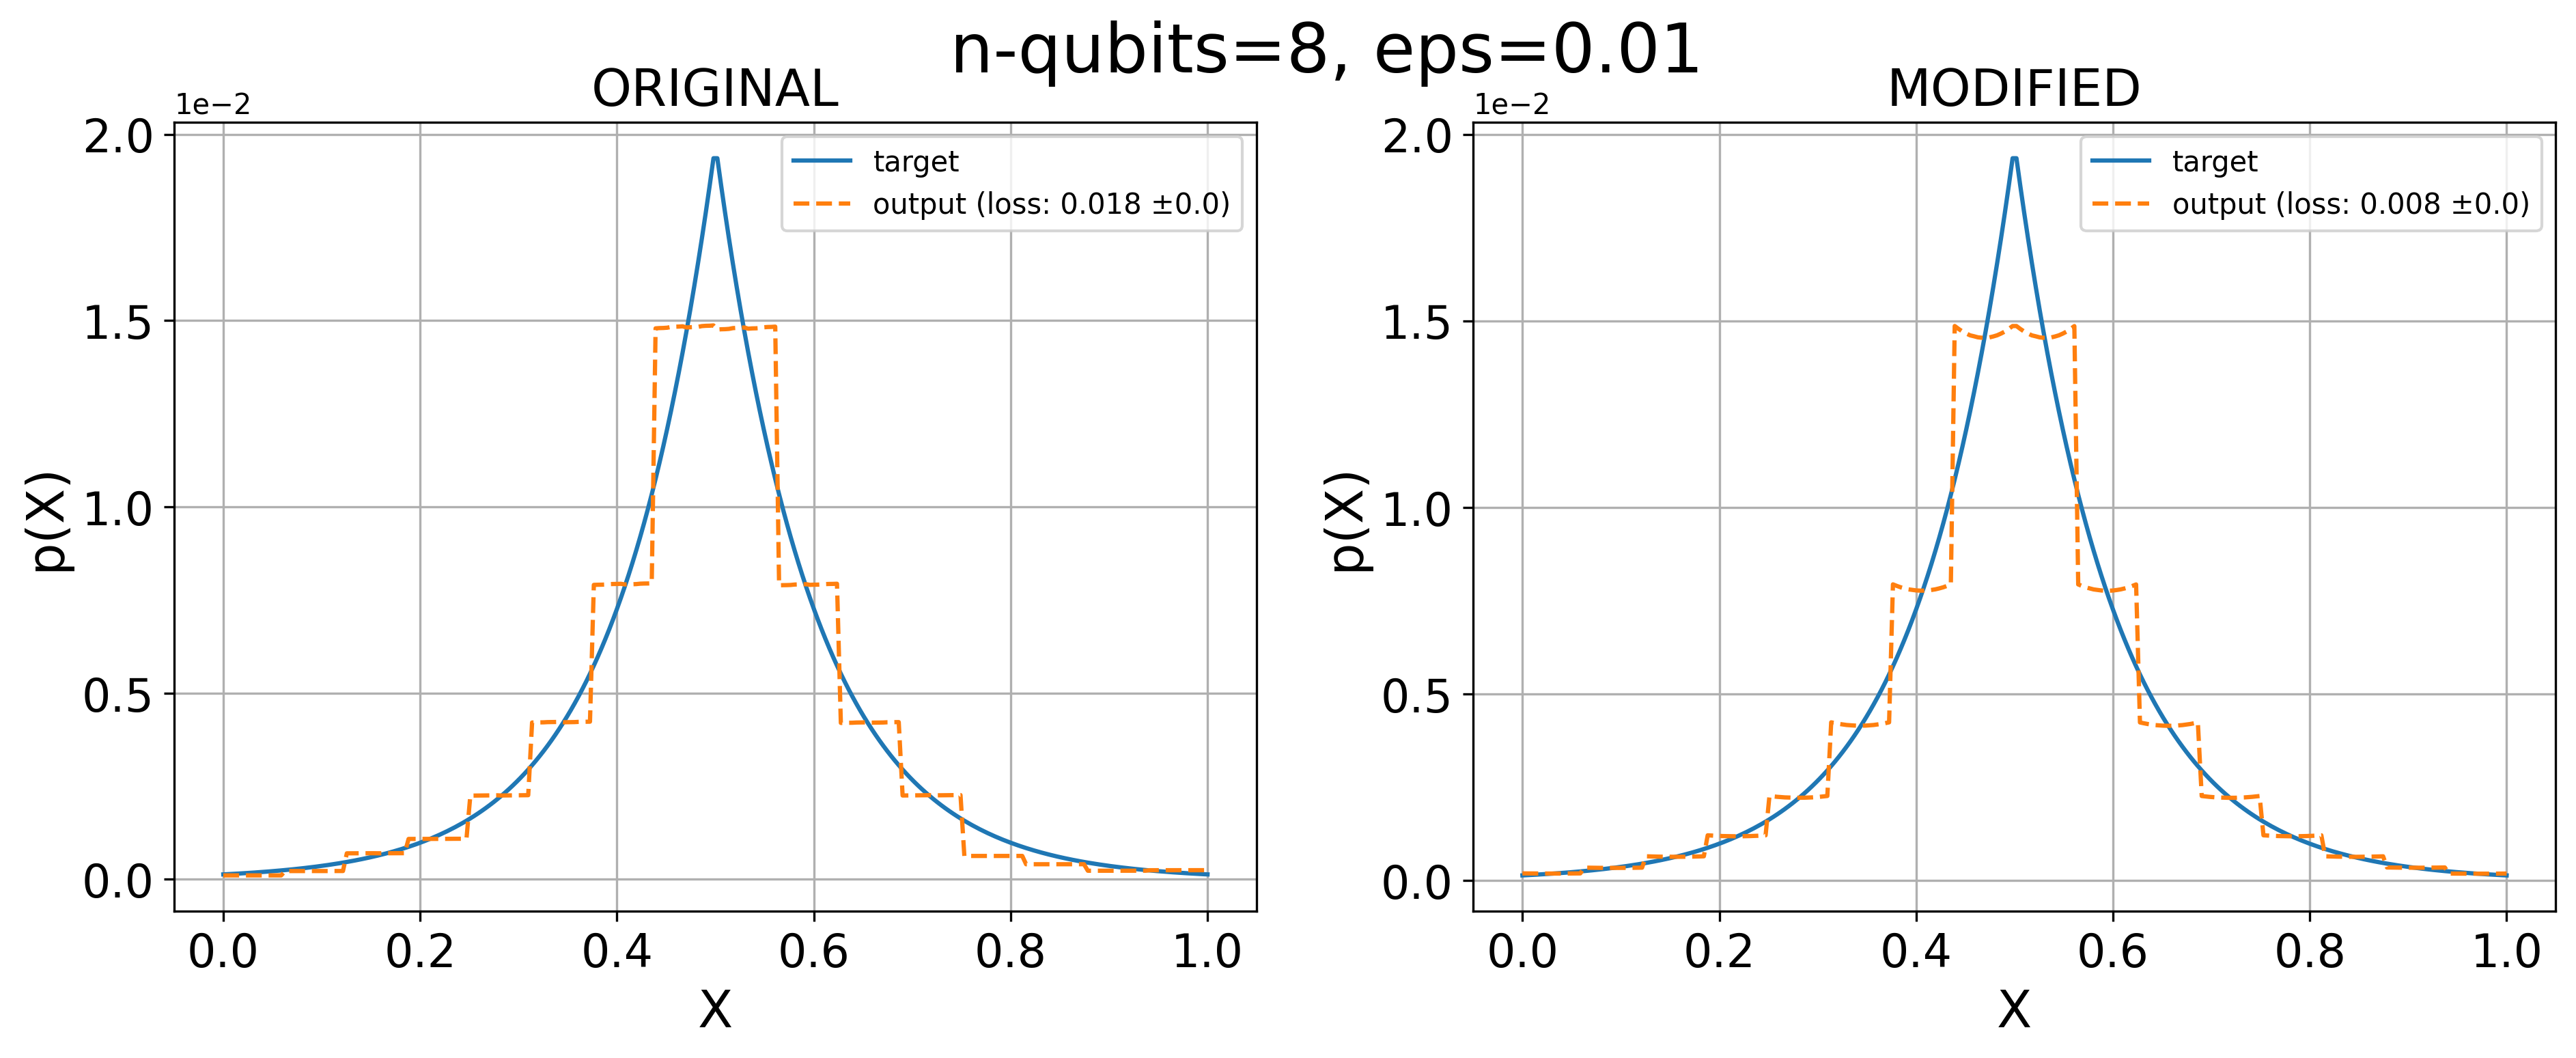

In [27]:
target_state = get_state(num_qubits=n_qubits, state_type=state_type, state_params={"x_points": (0, 1), "loc": 0.5, "scale": 0.2})


x_points = np.linspace(0, 1, 2**n_qubits)

target_freqs = np.abs(target_state)**2

#plt.ticklabel_format(axis="y", style="sci")
fig, axes = plt.subplots(1, 2, dpi=300)
fig.suptitle(f"n-qubits={n_qubits}, eps={eps_value}", fontsize=24)
fig.set_figheight(5)
fig.set_figwidth(15)
title_fontsize = 18
labels_fontsize= 18
ticks_fontsize = 16
axes[0].set_title("ORIGINAL", fontsize=title_fontsize)
axes[0].plot(x_points, target_freqs, label="target")
axes[0].plot(x_points, np.abs(sv_mean_original)**2, "--", label=f"output (loss: {round(df_mean_original.loc[n_qubits][eps_value], 3)} ±{round(df_stds_original.loc[n_qubits][eps_value], 2)})")
axes[0].grid()
axes[0].set_xlabel("X", fontsize=labels_fontsize)
axes[0].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[0].tick_params(labelsize=ticks_fontsize)
#axes[0].set_ylim([0, 0.0002])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].legend(loc="best")

axes[1].set_title("MODIFIED", fontsize=title_fontsize)
axes[1].plot(x_points, target_freqs, label="target")
axes[1].plot(x_points, np.abs(sv_mean_modified)**2, "--", label=f"output (loss: {round(df_mean_modified.loc[n_qubits][eps_value], 3)} ±{round(df_stds_modified.loc[n_qubits][eps_value], 2)})")
axes[1].grid()
axes[1].set_xlabel("X", fontsize=labels_fontsize)
axes[1].set_ylabel("p(X)", fontsize=labels_fontsize)
axes[1].tick_params(labelsize=ticks_fontsize)
#axes[1].set_ylim([0, 0.0002])
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[1].legend(loc="best")